<a href="https://colab.research.google.com/github/aslisahtopuz/FINAL-PIXEL2D/blob/main/Toaster_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving cleaned_concentration_data.csv to cleaned_concentration_data (10).csv

📌 NoCS_1
Mean: 1.31e+05
Std:  1.29e+05
Min:  6.47e+03
Max:  3.21e+05


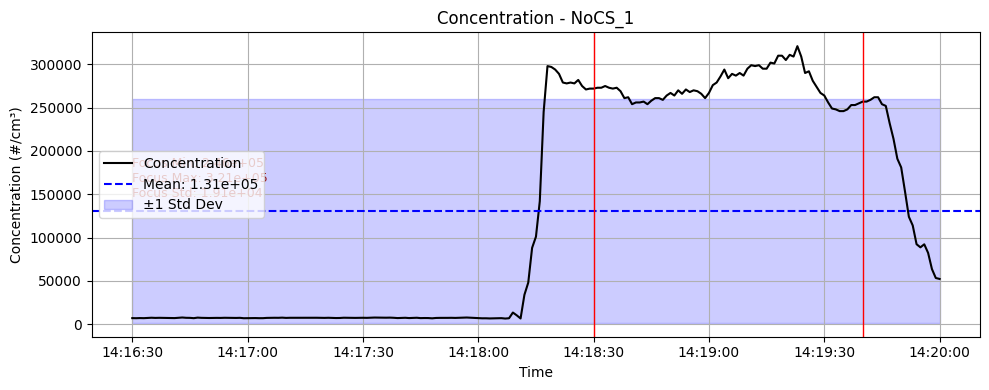


📌 WithCS_1
Mean: 6.29e+04
Std:  1.01e+05
Min:  1.83e+03
Max:  2.87e+05


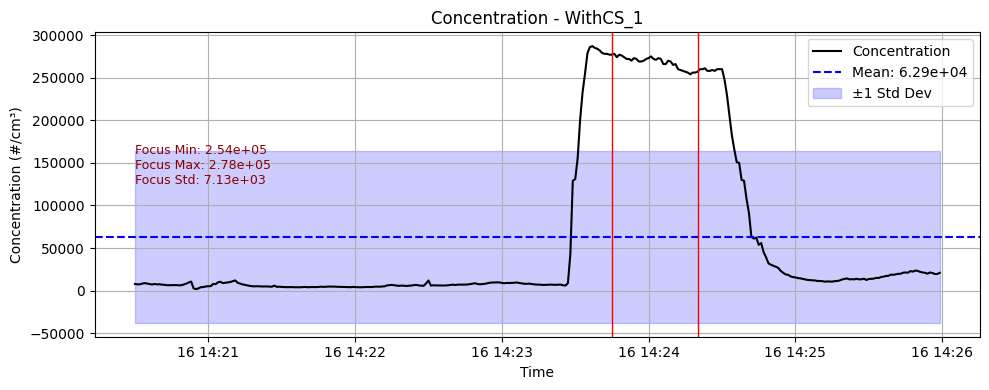


📌 NoCS_2
Mean: 9.52e+04
Std:  1.09e+05
Min:  7.69e+03
Max:  3.25e+05


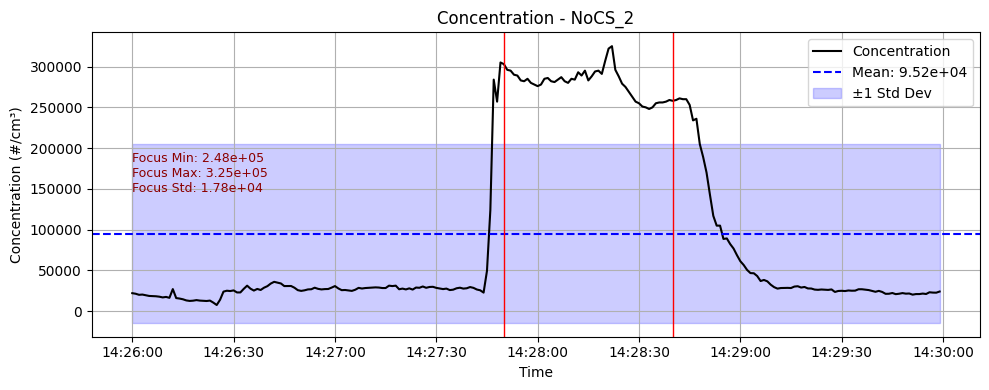


📌 WithCS_2
Mean: 7.17e+04
Std:  1.01e+05
Min:  3.54e+03
Max:  2.91e+05


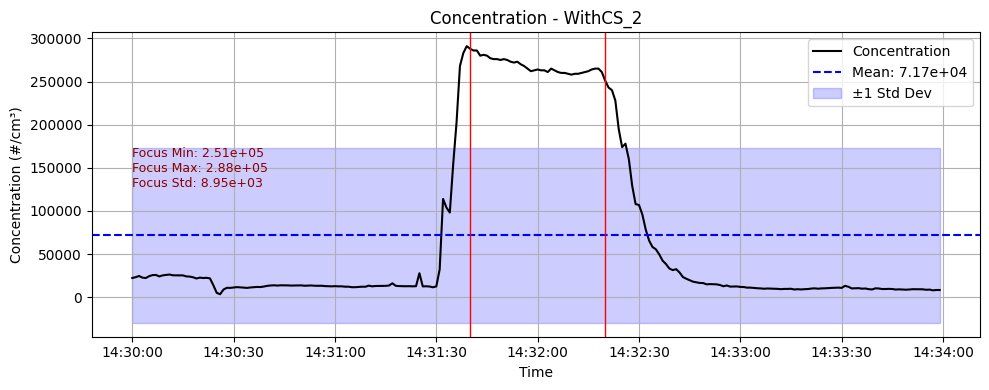


📌 NoCS_3
Mean: 8.72e+04
Std:  1.08e+05
Min:  3.22e+03
Max:  3.10e+05


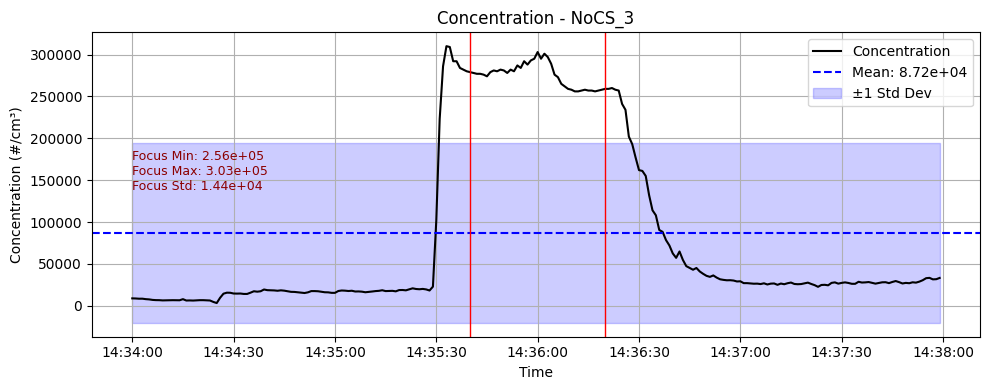


📌 WithCS_3
Mean: 7.46e+04
Std:  1.01e+05
Min:  4.29e+03
Max:  2.93e+05


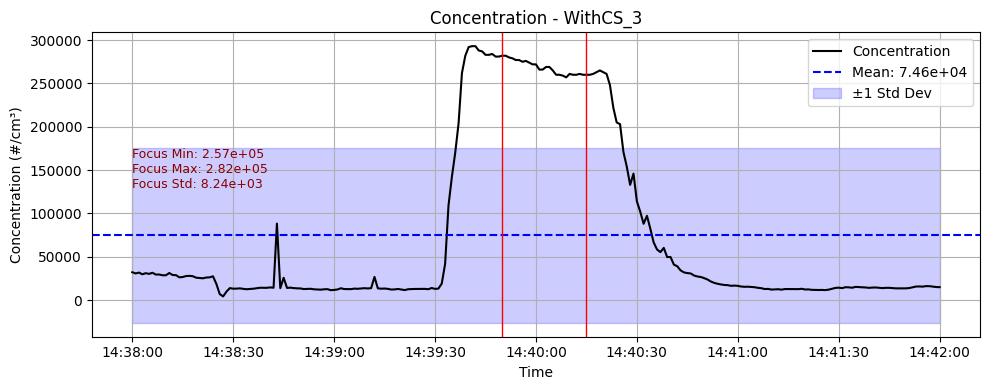


📌 NoCS_to_CS_Switch
Mean: 2.36e+04
Std:  7.09e+02
Min:  2.24e+04
Max:  2.48e+04


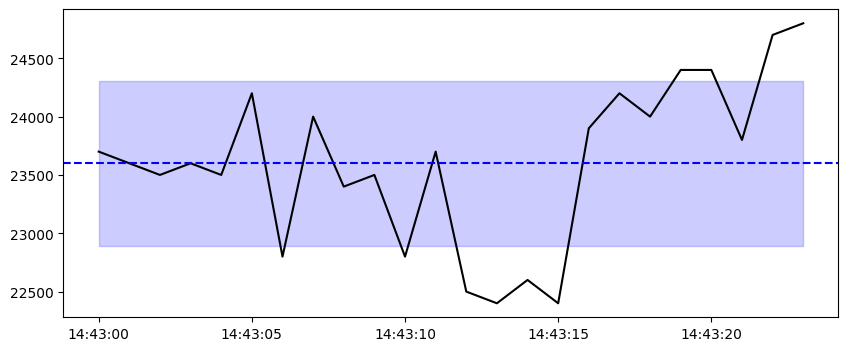

In [11]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt

# Bilimsel gösterim formatı
def sci(x):
    return f"{x:.2e}"

# CSV dosyasını oku ve zamanı düzenle
df = pd.read_csv("cleaned_concentration_data.csv")
df["Time"] = pd.to_datetime(df["Time"])

# Ölçüm segmentlerini tanımla
segments = [
    ("2025-07-16 14:16:30", "2025-07-16 14:20:00", "NoCS_1"),
    ("2025-07-16 14:20:30", "2025-07-16 14:25:59", "WithCS_1"),
    ("2025-07-16 14:26:00", "2025-07-16 14:29:59", "NoCS_2"),
    ("2025-07-16 14:30:00", "2025-07-16 14:33:59", "WithCS_2"),
    ("2025-07-16 14:34:00", "2025-07-16 14:37:59", "NoCS_3"),
    ("2025-07-16 14:38:00", "2025-07-16 14:42:00", "WithCS_3"),
    ("2025-07-16 14:43:00", "2025-07-16 14:43:23", "NoCS_to_CS_Switch")
]

# Her segmentin içindeki "focus" zaman aralıkları (isteğe göre zoom yapılacak yerler)
focus_intervals = {
    "NoCS_1":   ("2025-07-16 14:18:30", "2025-07-16 14:19:40"),
    "WithCS_1": ("2025-07-16 14:23:45", "2025-07-16 14:24:20"),
    "NoCS_2":   ("2025-07-16 14:27:50", "2025-07-16 14:28:40"),
    "WithCS_2": ("2025-07-16 14:31:40", "2025-07-16 14:32:20"),
    "NoCS_3":   ("2025-07-16 14:35:40", "2025-07-16 14:36:20"),
    "WithCS_3": ("2025-07-16 14:39:50", "2025-07-16 14:40:15")
}

# Tüm verileri önce "unknown" olarak işaretle
df["Condition"] = "unknown"

# Zaman segmentlerine göre etiketle
for start, end, label in segments:
    mask = (df["Time"] >= pd.to_datetime(start)) & (df["Time"] <= pd.to_datetime(end))
    df.loc[mask, "Condition"] = label

# Benzersiz etiketleri sırayla al
conditions = df["Condition"].unique()

# Her segment için analiz ve grafik
for cond in conditions:
    if cond == "unknown":
        continue  # analiz dışı segmentleri atla

    segment = df[df["Condition"] == cond]

    mean_val = segment["Concentration"].mean()
    std_val = segment["Concentration"].std()
    min_val = segment["Concentration"].min()
    max_val = segment["Concentration"].max()

    # Sayısal çıktı
    print(f"\n📌 {cond}")
    print(f"Mean: {sci(mean_val)}")
    print(f"Std:  {sci(std_val)}")
    print(f"Min:  {sci(min_val)}")
    print(f"Max:  {sci(max_val)}")

    # Grafik
    plt.figure(figsize=(10, 4))
    plt.plot(segment["Time"], segment["Concentration"], label="Concentration", color="black")
    plt.axhline(mean_val, color="blue", linestyle="--", label=f"Mean: {sci(mean_val)}")
    plt.fill_between(segment["Time"],
                     mean_val - std_val,
                     mean_val + std_val,
                     color='blue', alpha=0.2,
                     label='±1 Std Dev')

    # 🔴 Focus bölgesi çizgileri ve istatistikleri


    if cond in focus_intervals:
        start_focus, end_focus = focus_intervals[cond]
        start_focus = pd.to_datetime(start_focus)
        end_focus = pd.to_datetime(end_focus)

        # Dikey kırmızı çizgiler
        plt.axvline(start_focus, color='red', linestyle='-', linewidth=1)
        plt.axvline(end_focus, color='red', linestyle='-', linewidth=1)

        # Focus aralığındaki verileri filtrele
        focus_data = segment[(segment["Time"] >= start_focus) & (segment["Time"] <= end_focus)]

        if not focus_data.empty:
            focus_mean = focus_data["Concentration"].mean()
            focus_std = focus_data["Concentration"].std()
            focus_min = focus_data["Concentration"].min()
            focus_max = focus_data["Concentration"].max()

            # Grafik üstüne ekle
            plt.text(segment["Time"].iloc[0], max_val * 0.6,
                     f"Focus Min: {sci(focus_min)}\nFocus Max: {sci(focus_max)}\nFocus Std: {sci(focus_std)}",
                     fontsize=9, color='darkred', verticalalignment='top')
            plt.title(f"Concentration - {cond}")

            plt.xlabel("Time")
            plt.ylabel("Concentration (#/cm³)")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

import plotly.graph_objects as go

# Bilimsel gösterimle yeni sütunlar oluştur
focus_df_formatted = focus_df.copy()
for col in ["Mean", "Std", "Min", "Max"]:
    focus_df_formatted[col] = focus_df_formatted[col].apply(lambda x: f"{x:.2e}")




fig.update_layout(title="📊 Focus Interval Statistics Table")
fig.show()

# 📌 Kıyaslama yapılacak zamanlar
background_intervals = {
    "NoCS_1":   ("2025-07-16 14:16:30", "2025-07-16 14:18:00"),
    "WithCS_1": ("2025-07-16 14:10:21", "2025-07-16 14:16:23"),
    "NoCS_2":   ("2025-07-16 14:26:00", "2025-07-16 14:27:30"),
    "WithCS_2": ("2025-07-16 14:30:00", "2025-07-16 14:31:30"),
    "NoCS_3":   ("2025-07-16 14:34:00", "2025-07-16 14:35:30"),
    "WithCS_3": ("2025-07-16 14:38:00", "2025-07-16 14:39:30")
}

# Sonuçları tutacak liste
comparison_rows = []

for cond, (focus_start, focus_end) in focus_intervals.items():
    bg_start, bg_end = background_intervals.get(cond, (None, None))
    if not bg_start: continue  # eşleşme yoksa atla

    # Verileri al
    focus_data = df[(df["Condition"] == cond) &
                    (df["Time"] >= pd.to_datetime(focus_start)) &
                    (df["Time"] <= pd.to_datetime(focus_end))]

    bg_data = df[(df["Time"] >= pd.to_datetime(bg_start)) &
                 (df["Time"] <= pd.to_datetime(bg_end))]

    # İstatistikleri hesapla
    row = {
        "Condition": cond,
        "Focus Mean": focus_data["Concentration"].mean(),
        "Focus Std": focus_data["Concentration"].std(),
        "Focus Min": focus_data["Concentration"].min(),
        "Focus Max": focus_data["Concentration"].max(),
        "BG Mean": bg_data["Concentration"].mean(),
        "BG Std": bg_data["Concentration"].std(),
        "BG Min": bg_data["Concentration"].min(),
        "BG Max": bg_data["Concentration"].max()
    }
    comparison_rows.append(row)

# Tabloya dök
comparison_df = pd.DataFrame(comparison_rows)

# Bilimsel formatla
for col in comparison_df.columns[1:]:
    comparison_df[col] = comparison_df[col].apply(lambda x: f"{x:.2e}")

# Plotly ile göster
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=list(comparison_df.columns),
                fill_color='lightgrey',
                align='left'),
    cells=dict(values=[comparison_df[col] for col in comparison_df.columns],
               fill_color='white',
               align='left'))
])

fig.update_layout(title="🔬 Focus vs Background Interval Comparison")
fig.show()








